In [1]:
from IPython.display import Image

# SHAP values

In this tutorial you will learn:
* What are SHAP values?
* Example for Shapley values
* Example code to calculate SHAP

## What are SHAP values?

SHAP stands for SHapley Additive exPlanations. It was introduced in 2017.
Just like PDPs, SHAP values are also used to understand the black box machine learning algorithms better by quantifying each feature variable's contribution better.

Think of it this way, a machine learning model will tell you *what* decision was taken. SHAP values will tell you *why* that decision was taken.

SHAP values have been derived from Shapley values. Shapley values are a concept from game theory.

A game theory has at least 2 things, a game and some players. Shapley values are used to determine the contribution of each player towards winning the game. This game could be any task and the players will be the contributors to this task.

SHAP values, in a similar way, determine the contribution of each feature variable towards the machine learning model's output.

### Example for Shapley values
To understand these concepts better, let's take up an example to calculate shapley values.

Say that there are 3 students, A, B and C. They together are supposed to plant 500 saplings in their college campus.

The table below shows how much the students can plant individually, two at a time and all together.

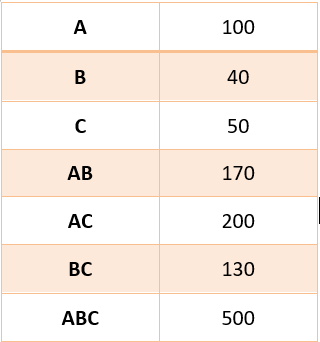

In [2]:
Image('ind-contribution.png')

The next step is to consider different coalitions or orders of the three stduents to see how much they individually contribute in each scenario. This will become clearer from the calculations shown below.

Note that in the table w(X) denotes the contribution of X.


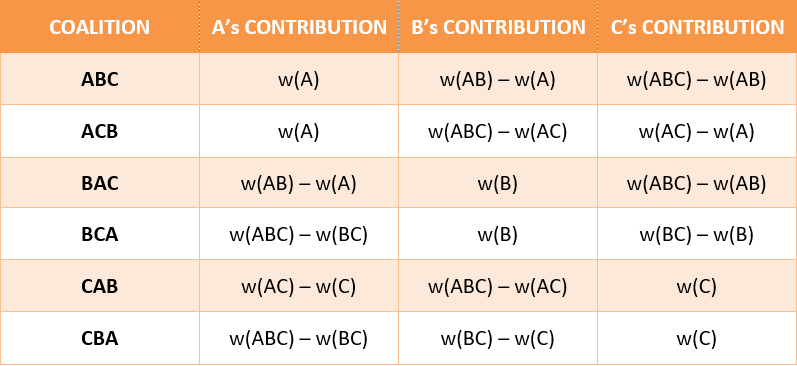

In [3]:
Image('calc.png')

Putting the values into variables above, we get the final count of each student's contribution.

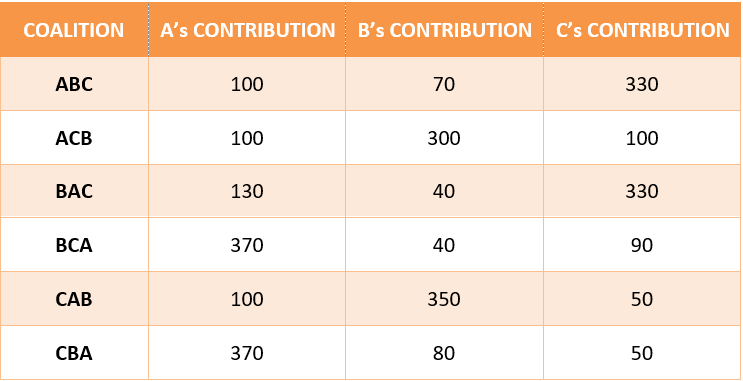

In [4]:
Image('coalition.png')

Now, to calculate the shapley value, you just have to find the average of contributions in all coalitions.

Note that there are a total of 6 coalitions for 3 students. 6 is equal to the factorial of 3. Thus for 4 students you would have factorial of 4 = 12 coalitions and so on.

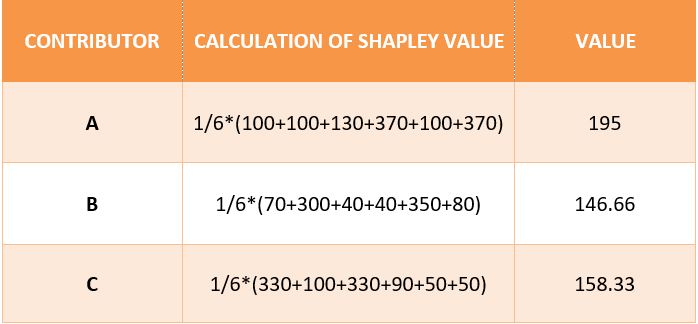

In [5]:
Image('shapley.png')

The shapley values above gives us the measure of contribution of each student. You can see that even though A can plant 100 trees, double of what C can plant individually, in a coalition their contribution doesnt have the same relation.

In other words, Shapley values give us the marginal contribution of each player.

In the very same way, SHAP values will give you the marginal contribution of each feature in a ML model.

SHAP requires to train a distinct predictive model for each distinct coalition of features, as seen above. Of course, these models are completely equivalent to each other in terms of their hyperparameters and their training data (which is the full dataset). The only thing that changes is the set of features included in the model.

## Example code to calculate SHAP

Let's see how SHAP is implemented on a real dataset.


For this example we will use a dataset containing the advertising data of a company. The target or output varaibel is sales, and the contributors or feature variables are TV, radio and newspaper.

In [6]:
# Import all relevant libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# Import the dataset
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Now that the data has been imported, the next step is to fit this data into a ML model. The model used here is the `RandomForestRegressor()`.

In [7]:
# Divide the dataset into feature variables (X) and output (Y)
Y = data['sales']
X =  data[['TV', 'radio', 'newspaper']]

# Divide into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Fit the data to model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Once the model has been fit, you can find out the SHAP values and plot them too.
As the model used here is random forest regressor, which is a tree based model, we will use `shap.TreeExplainer()`.

For non-tree based models you can use `shap.KernelExplainer()`.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


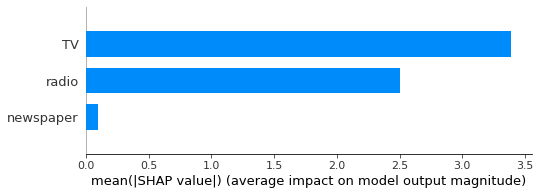

In [8]:
# Calculate shap values
shap_values = shap.TreeExplainer(model).shap_values(X_train)

# Plot shap values
shap.summary_plot(shap_values, X_train, plot_type="bar")

From this chart it can be easily deduced that the maximum effect on sales is due to advertising via TV and radio. 
Newspaper does not contribute much to the sales.

This is how SHAP makes the contribution of each feature variable visible.

## References

1. Towards Data Science [blog](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)
2. Towards Data Science [blog](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30)